In [3]:
from controller.camera import SpinnakerCamera
from camera_utils import record_background
import cucim.skimage.morphology as cskm
import time
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
gpu_enabled=True

In [4]:
background,_,_ = record_background(30,gpu_enabled=False)
background = cp.array(background)

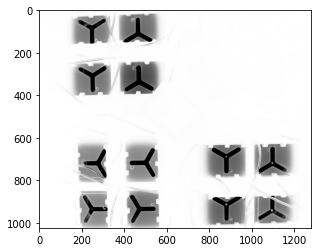

In [5]:
plt.imshow(background.get(),cmap='Greys')

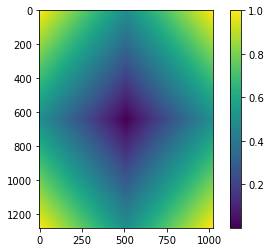

In [159]:
x,y = cp.meshgrid(cp.linspace(-1,1,1024),cp.linspace(-1,1,1280))
p = 1
z = (cp.abs(x)**p + cp.abs(y)**p)
z = z/z.max()
plt.imshow(z.get())
plt.colorbar()

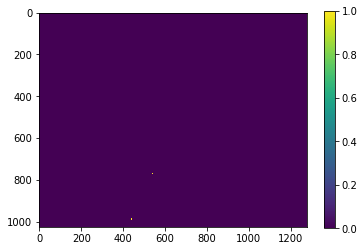

In [193]:
with SpinnakerCamera(gpu_enabled=gpu_enabled, record_video=True, video_output_name="test", video_output_path='') as cam:
    cam.start() # Start recording
    
    start = time.time()
    frames = np.zeros(100)
    for i in range(100):
        img1 = cam.get_array()
        frames[i] = time.time()-start
        # img1 = img1*z.T
        img1 = change_in_image(img1,background,gpu_enabled=gpu_enabled)
        img1 = cskm.opening(img1,footprint=cskm.disk(1))
        img1 = binarize(img1,20,gpu_enabled=gpu_enabled)
        if i % 100 == 0:
            plt.imshow(img1.get(),interpolation='none')
            plt.colorbar()
            plt.show()
        
    cam.stop() # Stop recording

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 98.]),
 array([  5.79414991,  15.21473492,  24.63531993,  34.05590494,
         43.47648994,  52.89707495,  62.31765996,  71.73824497,
         81.15882998,  90.57941499, 100.        ]),
 <BarContainer object of 10 artists>)

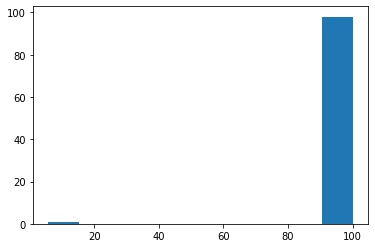

In [194]:
plt.hist(np.clip(1/np.diff(frames),0,100))

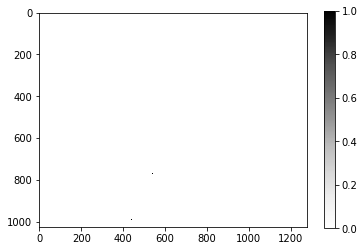

In [195]:
plt.imshow(img1.get(),cmap='Greys',interpolation='none')
plt.colorbar()

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

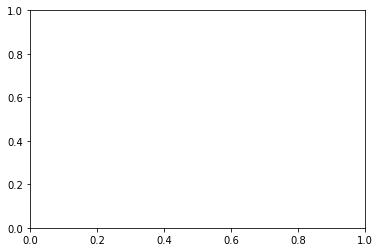

In [196]:
plt.hist(img1.get().flatten(),bins=100)

In [ ]:
imgs = imgs.get()
dist = cp.sqrt(x**2+y**2).get()

In [ ]:
plt.scatter(dist.flatten()[imgs.flatten()>10],imgs.flatten()[imgs.flatten()>10],s=1,alpha=0.1)